In [11]:
import numpy as np 
from scipy.integrate import odeint
import os, sys 
from pathlib import Path
from os.path import dirname, realpath
script_dir = Path(dirname(realpath('.')))
module_dir = str(script_dir)
sys.path.insert(0, module_dir + '/modules')
import utility as ut
import surrogate as sr
import matplotlib.pyplot as plt
import pandas as pd

**$\tau_f$ heatmap**

Time taken by get_mean_std is 0.07598996162414551 seconds
Time taken by get_mean_std is 0.07527494430541992 seconds


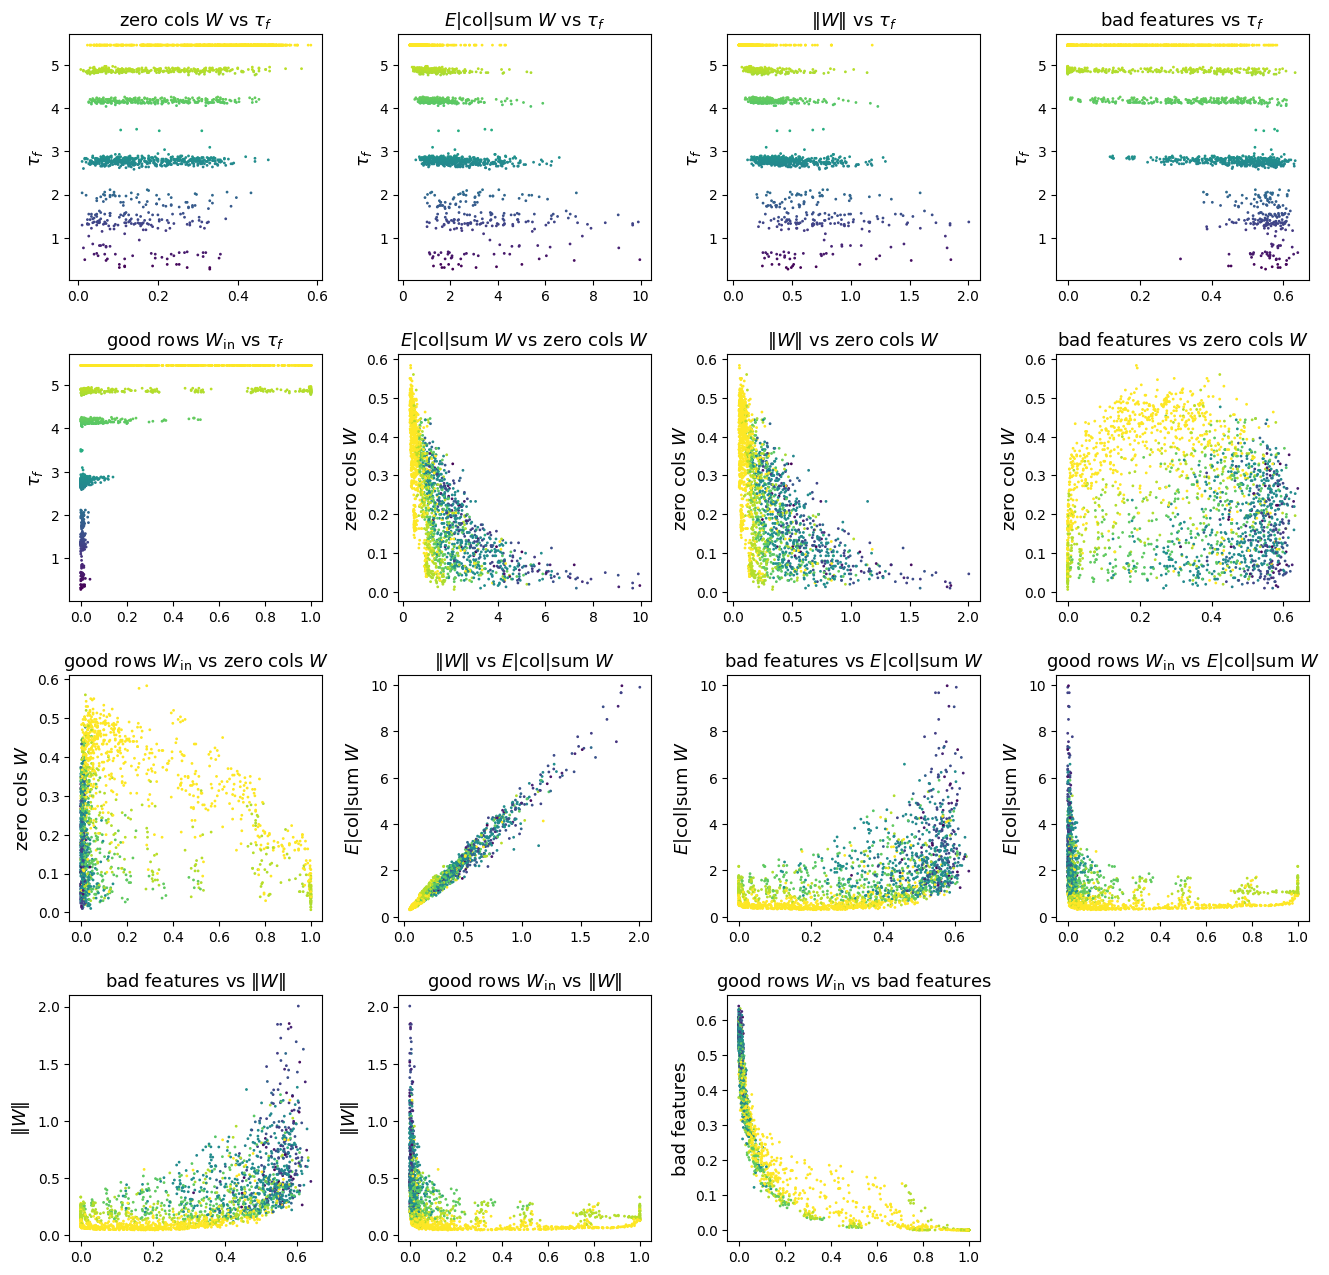

Time taken by plot is 1.745854139328003 seconds


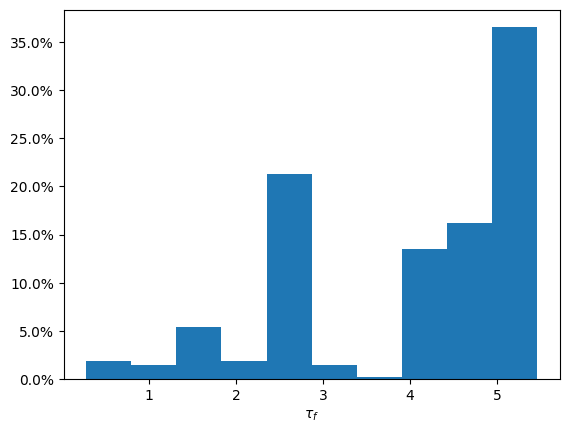

In [12]:
save_folder='../data/L63-SMLR-1'
plot_folder = save_folder + '/plots'
scale = 0
xlabel_size = ylabel_size = 15 + scale
tick_size = 10 + scale
legend_size = 15 + scale
title_size = 15 + scale

bra = sr.BatchRunAnalyzer_SMLR(save_folder=save_folder)
L63_data_folder = '../data/L63-trajectories'
u = np.load('{}/validation.npy'.format(L63_data_folder))
limits_in, limits = [-0.1, 0.1], [-.5, .5]

# bra.count(u[:, :1000], limits_in, limits)
# rmse_threshold = np.sqrt(0.05)
# bra.compute_error(u[:, :300], rmse_threshold)

bra.plot()

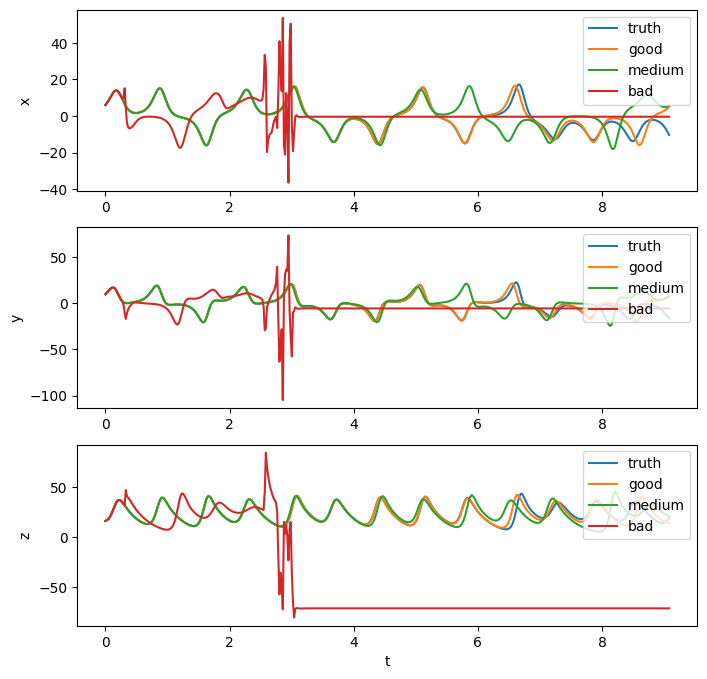

In [22]:
fig, N = plt.figure(figsize=(8, 8)), 500
t = np.arange(0., N*bra.dt, bra.dt) / bra.Lyapunov_time
axs = [fig.add_subplot(311), fig.add_subplot(312), fig.add_subplot(313)]
dims = ['x', 'y', 'z']
u = np.load('{}/validation.npy'.format(L63_data_folder))

idx = [[4, 14, 18], [13, 17, 46], [13, 2, 31], ]
labels = ['good', 'medium', 'bad']
for i, ax in enumerate(axs):
    ax.plot(t, u[i, :N], label='truth')
    for k, j in enumerate(idx):
        predicted = bra.get_model(*j).multistep_forecast(u[:, 0], N)
        ax.plot(t, predicted[i, :N], label=labels[k])
    ax.legend(loc='upper right')
    if i == len(dims)-1:
        ax.set_xlabel('t')
    ax.set_ylabel(dims[i])

/Users/pman0581/miniconda3/envs/metal/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


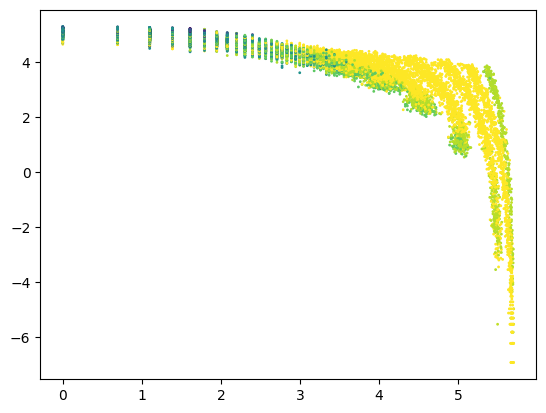

In [15]:
data = bra.get_data()
good_rows = data['good_rows_W_in']
bad_features = data['avg_bad_features']
tau_f = data['tau_f_se']

plt.scatter(np.log(good_rows), np.log(bad_features), c=tau_f, s=1)